# Used car price prediction

# Data Collection

In [1]:
#importing the libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
#reading the csv file
df=pd.read_csv("C:\\Users\\admin\\OneDrive\\Desktop\\used_car_dataset.csv")

In [3]:
df.head()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019


In [4]:
df.tail()

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
2100,Ford Figo Titanium1.5 TDCi,₹ 3.6 Lakh,"42,158 km",Diesel,Kolkata,2015
2101,MINI Cooper Countryman Cooper D,₹ 22 Lakh,"68,862 km",Diesel,Hyderabad,2013
2102,Hyundai Verna 1.6 VTVT SX,₹ 8.38 Lakh,"37,622 km",Petrol,Chennai,2018
2103,Maruti Suzuki Ciaz VXi+ AT,₹ 6.75 Lakh,"64,726 km",Petrol,Mumbai,2017
2104,Hyundai Verna 1.6 VTVT SX,₹ 8.76 Lakh,"29,150 km",Petrol,Pune,2017


# Understanding the data

In [5]:
df.shape

(2105, 6)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2105 entries, 0 to 2104
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   car_name             2105 non-null   object
 1   car_price_in_rupees  2105 non-null   object
 2   kms_driven           2105 non-null   object
 3   fuel_type            2105 non-null   object
 4   city                 2105 non-null   object
 5   year_of_manufacture  2105 non-null   int64 
dtypes: int64(1), object(5)
memory usage: 98.8+ KB


In [7]:
df.describe()

,year_of_manufacture
count,2105.000000
mean,2017.022803
std,2.818066
min,2004.000000
25%,2015.000000
50%,2017.000000
75%,2019.000000
max,2022.000000


# Cleaning the Data

In [8]:
car=df.copy()

In [9]:
car

,car_name,car_price_in_rupees,kms_driven,fuel_type,city,year_of_manufacture
0,Hyundai Grand i10 Magna 1.2 Kappa VTVT [2017-2...,₹ 4.45 Lakh,"22,402 km",Petrol,Mumbai,2016
1,Maruti Suzuki Alto 800 Lxi,₹ 2.93 Lakh,"10,344 km",Petrol,Kolkata,2019
2,Tata Safari XZ Plus New,₹ 22.49 Lakh,"12,999 km",Diesel,Bangalore,2021
3,Maruti Suzuki Ciaz ZXI+,₹ 6.95 Lakh,"45,000 km",Petrol,Thane,2016
4,Jeep Compass Sport Plus 1.4 Petrol [2019-2020],₹ 12 Lakh,"11,193 km",Petrol,Kolkata,2019
...,...,...,...,...,...,...
2100,Ford Figo Titanium1.5 TDCi,₹ 3.6 Lakh,"42,158 km",Diesel,Kolkata,2015
2101,MINI Cooper Countryman Cooper D,₹ 22 Lakh,"68,862 km",Diesel,Hyderabad,2013
2102,Hyundai Verna 1.6 VTVT SX,₹ 8.38 Lakh,"37,622 km",Petrol,Chennai,2018
2103,Maruti Suzuki Ciaz VXi+ AT,₹ 6.75 Lakh,"64,726 km",Petrol,Mumbai,2017


In [10]:
car.isnull().sum()

car_name               0
car_price_in_rupees    0
kms_driven             0
fuel_type              0
city                   0
year_of_manufacture    0
dtype: int64

In [11]:
car.duplicated().sum()

92

In [12]:
car.drop_duplicates(inplace=True)

In [13]:
#extracting the company name from car name
car['car_name']=car['car_name'].str.split(' ').str.slice(0,2).str.join(' ')
car['name']=car['car_name']

In [14]:
car['car_price_in_rupees']=car['car_price_in_rupees'].str.split(" ").str.get(1).str.replace(',','')
car["car_price_in_rupees"]=car["car_price_in_rupees"].str.replace('60 000','60.0')
car["car_price_in_rupees"]=car["car_price_in_rupees"].str.replace('99 991','99.991')
car["car_price_in_rupees"]=car["car_price_in_rupees"].astype(float)
car["car_price_in_rupees"]=car["car_price_in_rupees"]*100000

In [15]:
car["Price"]=car["car_price_in_rupees"]

In [16]:
car['fuel_type']=car['fuel_type'].str.split(" ").str.get(0).replace(',','')

In [17]:
car['fuel_type']

0       Petrol
1       Petrol
2       Diesel
3       Petrol
4       Petrol
         ...  
2100    Diesel
2101    Diesel
2102    Petrol
2103    Petrol
2104    Petrol
Name: fuel_type, Length: 2013, dtype: object

In [18]:
car['kms_driven']=car['kms_driven'].str.split(" ").str.get(0).str.replace(',','')
car['kms_driven']=car['kms_driven'].astype(int)

In [19]:
car['kms_driven']

0       22402
1       10344
2       12999
3       45000
4       11193
        ...  
2100    42158
2101    68862
2102    37622
2103    64726
2104    29150
Name: kms_driven, Length: 2013, dtype: int32

In [20]:
#Dropping the unwanted columns
car.drop(columns=['car_name','city','car_price_in_rupees'],inplace=True)

In [21]:
car

,kms_driven,fuel_type,year_of_manufacture,name,Price
0,22402,Petrol,2016,Hyundai Grand,445000.0
1,10344,Petrol,2019,Maruti Suzuki,293000.0
2,12999,Diesel,2021,Tata Safari,2249000.0
3,45000,Petrol,2016,Maruti Suzuki,695000.0
4,11193,Petrol,2019,Jeep Compass,1200000.0
...,...,...,...,...,...
2100,42158,Diesel,2015,Ford Figo,360000.0
2101,68862,Diesel,2013,MINI Cooper,2200000.0
2102,37622,Petrol,2018,Hyundai Verna,838000.0
2103,64726,Petrol,2017,Maruti Suzuki,675000.0


In [22]:
car.describe()

,kms_driven,year_of_manufacture,Price
count,2.013000e+03,2013.000000,2.013000e+03
mean,4.843062e+04,2017.023845,9.051722e+06
std,8.542756e+04,2.823402,2.598195e+08
min,6.400000e+01,2004.000000,1.100000e+05
25%,2.500000e+04,2015.000000,4.750000e+05
50%,4.282500e+04,2017.000000,6.990000e+05
75%,6.300000e+04,2019.000000,1.150000e+06
max,3.600000e+06,2022.000000,9.999100e+09


In [23]:
car=car[car['Price']<6900000].reset_index(drop=True)

In [24]:
car.to_csv("cleanedcar.csv")

# Data Visualisation

<Axes: >

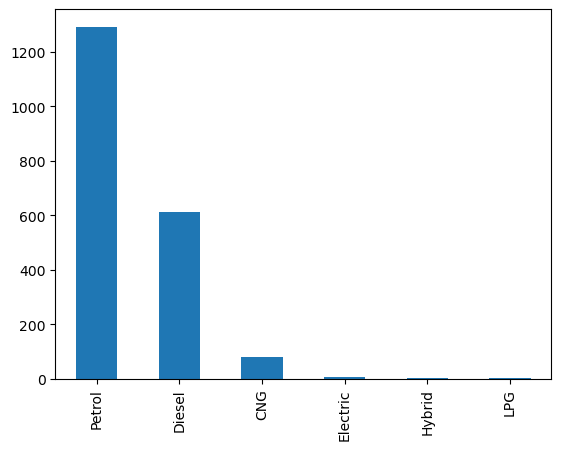

In [25]:
car['fuel_type'].value_counts().plot(kind='bar')

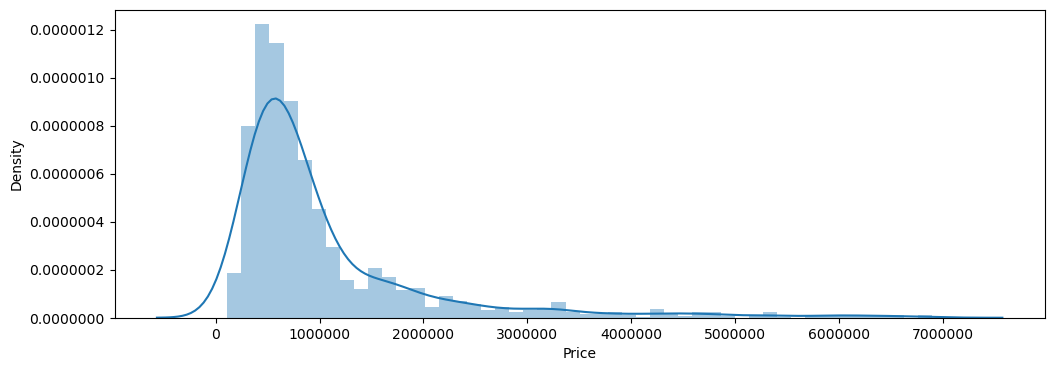

In [26]:
plt.figure(figsize=(12,4))
plt.ticklabel_format(style='plain')
sns.distplot(car['Price'])
plt.show()

# Feature Selection

In [27]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
columns=['kms_driven','year_of_manufacture']
car[columns]=scaler.fit_transform(car[columns])

# Model

In [28]:
x=car.drop(columns='Price')
y=car['Price']

In [29]:
x

,kms_driven,fuel_type,year_of_manufacture,name
0,-0.305580,Petrol,-0.365985,Hyundai Grand
1,-0.446249,Petrol,0.707224,Maruti Suzuki
2,-0.415276,Diesel,1.422697,Tata Safari
3,-0.041951,Petrol,-0.365985,Maruti Suzuki
4,-0.436345,Petrol,0.707224,Jeep Compass
...,...,...,...,...
1990,-0.075106,Diesel,-0.723721,Ford Figo
1991,0.236424,Diesel,-1.439194,MINI Cooper
1992,-0.128023,Petrol,0.349488,Hyundai Verna
1993,0.188173,Petrol,-0.008249,Maruti Suzuki


In [30]:
y

0        445000.0
1        293000.0
2       2249000.0
3        695000.0
4       1200000.0
          ...    
1990     360000.0
1991    2200000.0
1992     838000.0
1993     675000.0
1994     876000.0
Name: Price, Length: 1995, dtype: float64

In [31]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=49)

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline

In [33]:
ohe=OneHotEncoder()
ohe.fit(x[['name','fuel_type']])

OneHotEncoder()

In [34]:
column_trans=make_column_transformer((OneHotEncoder(categories=ohe.categories_),['name','fuel_type']),remainder='passthrough')

In [35]:
LinearRegression

sklearn.linear_model._base.LinearRegression

In [36]:
lr=LinearRegression()

In [37]:
pipe=make_pipeline(column_trans,lr)

In [38]:
pipe.fit(x_train,y_train)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(categories=[array(['Audi A3', 'Audi A4', 'Audi A6', 'Audi A8', 'Audi Q2', 'Audi Q3',
       'Audi Q5', 'Audi Q7', 'Audi TT', 'BMW 3', 'BMW 5', 'BMW 7',
       'BMW X1', 'BMW X3', 'BMW X4', 'BMW X5', 'Chevrolet Beat',
       'Chevrolet Cruze', 'Chevrolet Optra', 'Chevrolet Tavera',
       'Citr...
       'Volkswagen Cross', 'Volkswagen Jetta', 'Volkswagen Passat',
       'Volkswagen Polo', 'Volkswagen Taigun', 'Volkswagen Tiguan',
       'Volkswagen Vento', 'Volvo S60', 'Volvo S90', 'Volvo V40',
       'Volvo V90', 'Volvo XC60', 'Volvo XC90'], dtype=object),
                                                                            array(['CNG', 'Diesel', 'Electric', 'Hybrid', 'LPG', 'Petrol'],
      dtype=object)]),
                                                  ['name', 'fuel_type'])])),
                ('linearregression', LinearRegression())])

In [39]:
y_pred=pipe.predict(x_test)

In [40]:
r2_score(y_test,y_pred)

0.8681641012235943